In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from soccerplots.radar_chart import Radar

In [2]:
#read in the data
df = pd.read_csv('radars.csv')

In [3]:
df.head()

,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,Sh,...,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,1,Patrick van Aanholt\Patrick-van-Aanholt,nl NED,DF,Crystal Palace,30-185,1990,13.7,0,15,...,20.6,3,0,0,0.8,0.8,0.05,-0.8,-0.8,Matches
1,2,Tammy Abraham\Tammy-Abraham,eng ENG,FW,Chelsea,23-151,1997,11.3,6,31,...,9.9,0,0,0,5.6,5.6,0.18,0.4,0.4,Matches
2,3,Che Adams\Che-Adams,eng ENG,FW,Southampton,24-232,1996,21.2,4,40,...,13.5,0,0,0,5.3,5.3,0.13,-1.3,-1.3,Matches
3,4,Tosin Adarabioyo\Tosin-Adarabioyo,eng ENG,DF,Fulham,23-159,1997,22.0,0,17,...,9.0,0,0,0,0.9,0.9,0.06,-0.9,-0.9,Matches
4,5,Adrián\Adrian,es ESP,GK,Liverpool,34-058,1987,3.0,0,0,...,NaN,0,0,0,0.0,0.0,NaN,0.0,0.0,Matches


In [4]:
df = df[(df['Player']=='Trent Alexander-Arnold\Trent-Alexander-Arnold') | (df['Player']=='Kyle Walker\Kyle-Walker')].reset_index()

In [5]:
df = df.drop(['index','Rk','Nation','Pos','Squad','Age','Born','90s','FK','PK','PKatt','Matches'],axis=1)
df.head()

,Player,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Trent Alexander-Arnold\Trent-Alexander-Arnold,1,36,8,22.2,1.60,0.36,0.03,0.13,24.1,1.9,1.9,0.05,-0.9,-0.9
1,Kyle Walker\Kyle-Walker,1,9,3,33.3,0.59,0.20,0.11,0.33,28.6,0.2,0.2,0.02,0.8,0.8


In [6]:
df1 = df
df = df1[['Player','Sh', 'Sh/90' , 'xG', 'G-xG', 'G/Sh' , 'G/SoT', 'Dist', ]]
df.head()

,Player,Sh,Sh/90,xG,G-xG,G/Sh,G/SoT,Dist
0,Trent Alexander-Arnold\Trent-Alexander-Arnold,36,1.60,1.9,-0.9,0.03,0.13,24.1
1,Kyle Walker\Kyle-Walker,9,0.59,0.2,0.8,0.11,0.33,28.6


In [7]:
#get parameters
params = list(df.columns)
params = params[1:]
params

['Sh', 'Sh/90', 'xG', 'G-xG', 'G/Sh', 'G/SoT', 'Dist']

In [8]:
df.head()

,Player,Sh,Sh/90,xG,G-xG,G/Sh,G/SoT,Dist
0,Trent Alexander-Arnold\Trent-Alexander-Arnold,36,1.60,1.9,-0.9,0.03,0.13,24.1
1,Kyle Walker\Kyle-Walker,9,0.59,0.2,0.8,0.11,0.33,28.6


In [9]:
#add ranges to list of tuple pairs
ranges = []
a_values = []
b_values = []

for x in params:
    a = min(df[params][x])
    a = a - (a*.25)
    
    b = max(df[params][x])
    b = b + (b*.25)
    
    ranges.append((a,b))
    
for x in range(len(df['Player'])):
    if df['Player'][x] == 'Trent Alexander-Arnold\Trent-Alexander-Arnold':
        a_values = df.iloc[x].values.tolist()
    if df['Player'][x] == 'Kyle Walker\Kyle-Walker':
        b_values = df.iloc[x].values.tolist()
        
a_values = a_values[1:]
b_values = b_values[1:]

values = [a_values,b_values]

In [10]:
values

[[36, 1.6, 1.9, -0.9, 0.03, 0.13, 24.1], [9, 0.59, 0.2, 0.8, 0.11, 0.33, 28.6]]

In [14]:
#title 

title = dict(
    title_name='Trent Alexander-Arnold',
    title_color = '#F2ABAE',
    subtitle_name = 'Liverpool',
    subtitle_color = '#F2ABAE',
    title_name_2='Kyle Walker',
    title_color_2 = 'blue',
    subtitle_name_2 = 'Manchester City',
    subtitle_color_2 = 'blue',
    title_fontsize = 18,
    subtitle_fontsize=15
)

endnote = '@mckayjohns\ndata via FBREF / Statsbomb'

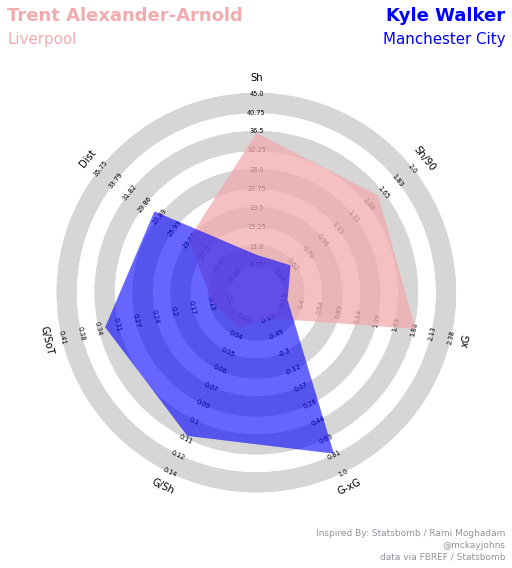

In [15]:
radar = Radar()

fig,ax = radar.plot_radar(ranges=ranges,params=params,values=values,
                         radar_color=['#F2ABAE','blue'],
                         alphas=[.75,.6],title=title,endnote=endnote,
                         compare=True)